**In machine learning, Naïve Bayes classification is a straightforward and powerful algorithm for the classification task. In this kernel, I implement Naive Bayes Classification algorithm with Python and Scikit-Learn. I build a Naive Bayes Classifier to predict whether a person makes over 50K a year.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') #never print matching warnings

**Import dataset & EDA**

In [14]:
df=pd.read_csv('/content/adult.csv', header=None, sep=',\s')
print(df.shape)
df.head()

(32561, 15)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Rename the columns

In [15]:
print(df.columns)
#We see our dataframe has not column names.  So, we should provide some

cols=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns=cols
df.columns             

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [16]:
#Let's print it again
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [17]:
#View the statistical summary of the dataset
print(df.describe())

df.info()

                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries

In [18]:
#Find which columns contain categorical variable

cat=[var for var in df.columns if df[var].dtype=="object"]

print('There are {} categorical variables\n'.format(len(cat)))
print('The categorical variables are: \n', cat)

There are 9 categorical variables

The categorical variables are: 
 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [19]:
#View those Categorical values
df[cat].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


**Explore problems within categorical variables**

In [20]:
#Missing values in categorical variables
print(df[cat].isnull().sum(),'\n')

#Missing values in the whole dataset
df.isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64 



age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

We see that  there is no missing values in the categorical columns and not even in the whole dataset

In [21]:
#Frequency counts of the Categorical variables

for i in cat:
  print(df[i].value_counts())

# value_counts is used the count the unique values and only count() is used to count the total values


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [22]:
#Finding unique values
for i in df.columns:
  print(df[i].unique())

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

Now, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Generally, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python can detect these missing values.

I will explore these variables and replace ? with NaN.

Replace '?' by NaN values

In [23]:
df['workclass'].replace('?', np.NaN, inplace=True)
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [24]:
df['occupation'].replace('?', np.NaN, inplace=True)
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [25]:
df['native_country'].replace('?', np.NaN, inplace=True)
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

Now recheck the missing values in categorical

In [26]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Number of labels: cardinality<br>
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [27]:
# check for cardinality in categorical variables

for var in cat:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


**Explore Numerical Variables**

In [28]:
# find numerical variables

num = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(num)))

print('The numerical variables are :', num)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [29]:
df[num].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [30]:
#Missing values in numerical variables
df[num].isnull().sum()


age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Great! There is no missing vales

**Declare feature vector and target variable**

In [31]:
#Here 'income'  column is out target set
x=df.drop(['income'], axis=1)
y=df['income']
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

Split dataset into tarin and test

In [32]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0)
[x_train.shape, x_test.shape]

[(22792, 14), (9769, 14)]

**Feature Engineering**<br>Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.

In [33]:
#Engineering missing values in categorical variables
cat= [col for col in x_train.columns if x_train[col].dtypes == 'O']

x_train[cat].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [34]:
# print categorical variables with missing data

for col in cat:
    if x_train[col].isnull().mean()>0:
        print(col, (x_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [35]:
#impute missing categorical variables with most frequent value
for df2 in [x_train, x_test]:
    df2['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(x_train['native_country'].mode()[0], inplace=True)   

In [36]:
#Check is there any missing values in the x_train set
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [37]:
#Check is there any missing values in the x_test set
x_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

Encode Categorical Variables using onehot encoding method

In [38]:
#import category encoders
!pip install category_encoders
import category_encoders as ce

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [39]:
# Let's Encode
encoder= ce.OneHotEncoder(cols=df[cat])
x_train=encoder.fit_transform(x_train)
x_test=encoder.transform(x_test)

In [40]:
#Let's see whether it is encoded or not. If it is then shape will increase
print(x_train.shape)
x_train.head()

(22792, 105)


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#Do the same for the test set
print(x_test.shape)
x_test.head()

(9769, 105)


,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


Great! It is successfully encoded

**Features Scalling**

In [42]:
cols=x_train.columns
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)

In [43]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
x_train = scaler.fit_transform(x_train)

x_test= scaler.fit_transform(x_test)
x_train

array([[ 0.4 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.5 , -1.  ,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.55,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-0.7 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.4 , -1.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.6 ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [44]:
# Make the preprocessed scaler into pandas dataframe
x_train=pd.DataFrame(x_train, columns=[cols])
x_test=pd.DataFrame(x_test, columns=[cols])

print(x_train.head())
print(x_test.head())

    age workclass_1 workclass_2 workclass_3 workclass_4 workclass_5  \
0  0.40         0.0         0.0         0.0         0.0         0.0   
1  0.50        -1.0         1.0         0.0         0.0         0.0   
2  0.55         0.0         0.0         0.0         0.0         0.0   
3 -0.40         0.0         0.0         0.0         0.0         0.0   
4 -0.70         0.0         0.0         0.0         0.0         0.0   

  workclass_6 workclass_7 workclass_8    fnlwgt  ... native_country_32  \
0         0.0         0.0         0.0 -0.058906  ...               0.0   
1         0.0         0.0         0.0 -0.578076  ...               0.0   
2         0.0         0.0         0.0  0.080425  ...               0.0   
3         0.0         0.0         0.0 -0.270650  ...               0.0   
4         0.0         0.0         0.0  0.210240  ...               0.0   

  native_country_33 native_country_34 native_country_35 native_country_36  \
0               0.0               0.0              

We now have x_train dataset ready to be fed into our model i.e our Gaussian Naive Bayes classifer. 

**Create The Model**

In [45]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [46]:
#Predict the results
y_pred=gnb.predict(x_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

In [47]:
#check the accuracy score
from sklearn.metrics import accuracy_score
print("Model accuracy is:", accuracy_score(y_test, y_pred))

Model accuracy is: 0.8060190398198382


In [48]:
#check the training accuracy
y_train_pred=gnb.predict(x_train)
print("Model Accuracy is: ", accuracy_score(y_train, y_train_pred))

Model Accuracy is:  0.8067304317304317


So, no overfitting or underfitting happens

**Confusion matrix** <br>
A confusion matrix is a tool for summarizing the perforamnce of a classification algorithm. It will give us a clear picture of classification model performance and the types of errors produced by the model.

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

print('Confusion Matrix: ', cm)
print('\nTrue Positive: ', cm[0,0])
print('\nTrue Negative: ', cm[1,1])
print('\n False Positive: ', cm[0,1])
print('\n False Negative: ', cm[1,0])

Confusion Matrix:  [[5978 1429]
 [ 466 1896]]

True Positive:  5978

True Negative:  1896

 False Positive:  1429

 False Negative:  466


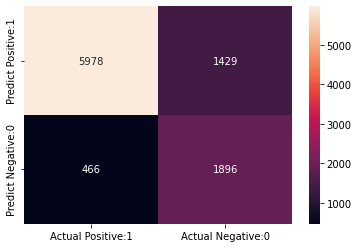

In [50]:
#Plot the confusion Matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d')

**Classification Matrix**
It is the another way to evaluate the classification model performance. It displays the precision, recall, F1 score and support.

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.80      0.76      9769
weighted avg       0.84      0.81      0.82      9769



**ROC AUC** <br>
ROC AUC stands for Receiver Operating Characteristics- Area Under Curve. It is a technique to compare clasifier performance. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. <br>
ROC AUC is a single number summary of a classifier of performace. *The higher the value, the better the classifer.*

In [52]:
from sklearn.metrics import roc_auc_score

y_pred1 = gnb.predict_proba(x_test)[:, 1]

Area=roc_auc_score(y_test, y_pred1)
print("So the area is: ", Area)

So the area is:  0.8931980949892125
